In [1]:
#import macroparameters
from experiment_metadata import *

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import plotly.express as px


# Import curve fitting package from scipy
if using_standard_curve == True:
    from sklearn.linear_model import LinearRegression
    
    
import os, sys, shutil

"""
if save_figures == 1:
    
    os.chdir('/src/output/')
    plt.savefig('Prior_Distributions.png')
    os.chdir('/src/processed_data_files/')
    print(os.getcwd())
    """

def print_all_df(df):
    # Permanently changes the pandas settings
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', -1)
    
    # All dataframes hereafter reflect these changes.
    display(df)
    
    print('**RESET_OPTIONS**')
    
    # Resets the options
    pd.reset_option('all')
    

In [2]:
# navigate into processed_data_files and grab the parsed dataset

os.chdir('/src/processed_data_files/')
os.getcwd()

items = os.listdir(".")

# lists all .csv
csv_list = []
for names in items:
    if names.endswith(".csv"):
        csv_list.append(names)
print(csv_list)



['220522_OPP2_titration_gain_filtered_data.csv', '220522_OPP2_titration_parsed_dataset.csv', '220522_OPP2_titration_tidy_data.csv']


In [3]:
##########################################################################################

# find the tidy dataset
for l in csv_list:
    if l[-23:] == '_gain_filtered_data.csv':

        dataset = l

gain_only_data = pd.read_csv(dataset, header=0)
gain_only_data

,Well,Sample ID,Time (Minutes),RFUs,Gain Setting,Chromatic Settings,Amplicon DNA Template,Energy Solution,K_Glutamate_mM,Mg_Acetate_mM,Reaction Type,Replicate,System,Reaction Temperature (°C),Performed by,Instrument,Experiment #,Assay Date
0,C03,Sample X1,0,3181,1500,485_520,T7_GFP_MGA,Grassman ES,20.0,8.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
1,C06,Sample X2,0,3042,1500,485_520,T7_GFP_MGA,Grassman ES,20.0,8.0,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
2,F03,Sample X3,0,3076,1500,485_520,T7_GFP_MGA,Grassman ES,20.0,9.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
3,F06,Sample X4,0,3066,1500,485_520,T7_GFP_MGA,Grassman ES,20.0,9.0,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
4,I03,Sample X5,0,3137,1500,485_520,T7_GFP_MGA,Grassman ES,20.0,10.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,I18,Sample X26,700,65799,3000,635_680,T7_GFP_MGA,Grassman ES,40.0,10.0,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
21056,L15,Sample X27,700,64073,3000,635_680,T7_GFP_MGA,Grassman ES,40.0,11.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
21057,L18,Sample X28,700,61866,3000,635_680,T7_GFP_MGA,Grassman ES,40.0,11.0,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21
21058,O15,Sample X29,700,55646,3000,635_680,None,NaN,NaN,NaN,Blank,1,NaN,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21


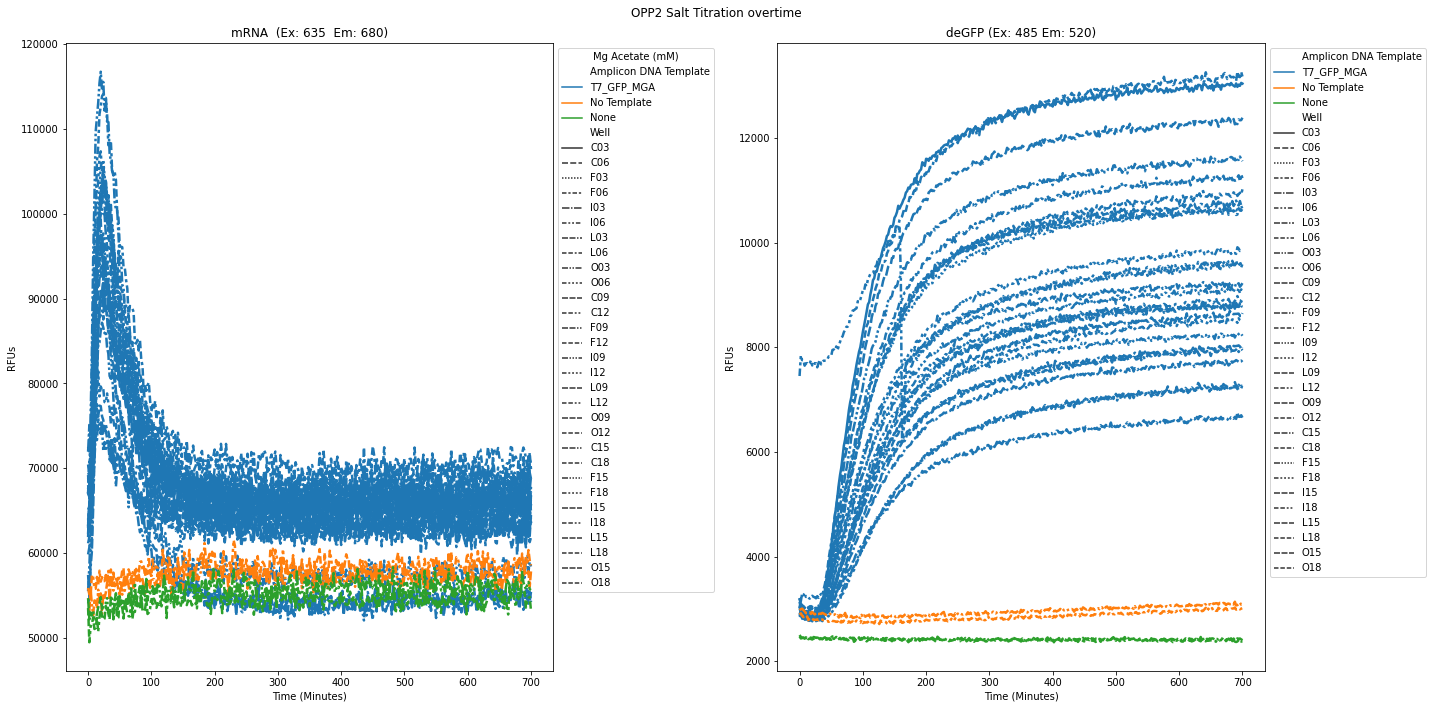

In [4]:
fig = plt.figure(figsize=(20, 10))

ax = plt.subplot(1, 2, 1)


test = gain_only_data[gain_only_data['Chromatic Settings'] == '635_680']
ax.set_title('mRNA  (Ex: 635  Em: 680)')
sns.lineplot(data=test,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Amplicon DNA Template',
                     style = 'Well',
                     palette="tab10",
                     linewidth=2.5,
                     ax = ax,
                     ci = None,
                     legend = 'brief')


plt.legend(title = 'Mg Acetate (mM)',loc = 2, bbox_to_anchor = (1,1))
ax = plt.subplot(1, 2, 2)

test = gain_only_data[gain_only_data['Chromatic Settings'] == '485_520']
ax.set_title('deGFP (Ex: 485 Em: 520)')
sns.lineplot(data=test,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Amplicon DNA Template',
                     style = 'Well',
                     palette="tab10",
                     linewidth=2.5,
                     ax = ax,
                     ci = None,
                     legend = 'brief')

fig.suptitle('OPP2 Salt Titration overtime')

plt.subplots_adjust(hspace=10)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
fig.tight_layout()





plt.show()

In [5]:
# RNA 

# get only mRNA Channel
mRNA = gain_only_data[gain_only_data['Chromatic Settings'] == '635_680']

# get negative controls
mRNA_negative_ctrl = mRNA[mRNA['Amplicon DNA Template'] == 'No Template']


In [6]:
# mRNA

GFP = gain_only_data[gain_only_data['Chromatic Settings'] == '485_520']
GFP_negative_ctrl = GFP[GFP['Amplicon DNA Template'] == 'No Template']
GFP = pd.concat([GFP, GFP_negative_ctrl], axis=0)
GFP.reset_index(drop=True, inplace=True)

# some crappy for loop to make the plotting 
GFP['Legend'] = ' '

for i, row in GFP.iterrows():
    GFP.loc[i, 'Legend'] = GFP.loc[i, 'Amplicon DNA Template'] + ' ' + str(GFP.loc[i, 'Mg_Acetate_mM'])

In [7]:
def merge_plot_columns(df):
    # some crappy for loop to make the plotting 
    df['Legend'] = ' '

    for i, row in df.iterrows():
        df.loc[i, 'Legend'] = 'Template: ' + df.loc[i, 'Amplicon DNA Template'] + ', Mg (mM): ' + str(df.loc[i, 'Mg_Acetate_mM'])


    return df


k_20_mRNA  = mRNA[mRNA['K_Glutamate_mM'] == 20.0]
k_20_mRNA  = pd.concat([k_20_mRNA, mRNA_negative_ctrl])
k_20_mRNA.reset_index(drop=True, inplace=True)
k_20_mRNA = merge_plot_columns(k_20_mRNA)

k_20_gfp  = GFP[GFP['K_Glutamate_mM'] == 20.0]
k_20_gfp  = pd.concat([k_20_gfp, GFP_negative_ctrl])
k_20_gfp.reset_index(drop=True, inplace=True)
k_20_gfp = merge_plot_columns(k_20_gfp)


k_30_mRNA  = mRNA[mRNA['K_Glutamate_mM'] == 30.0]
k_30_mRNA  = pd.concat([k_30_mRNA, mRNA_negative_ctrl])
k_30_mRNA.reset_index(drop=True, inplace=True)
k_30_mRNA = merge_plot_columns(k_30_mRNA)


k_30_gfp = GFP[GFP['K_Glutamate_mM'] == 30.0]
k_30_gfp  = pd.concat([k_30_gfp, GFP_negative_ctrl])
k_30_gfp.reset_index(drop=True, inplace=True)
k_30_gfp = merge_plot_columns(k_30_gfp)


k_40_mRNA  = mRNA[mRNA['K_Glutamate_mM'] == 40.0]
k_40_mRNA  = pd.concat([k_40_mRNA, mRNA_negative_ctrl])
k_40_mRNA.reset_index(drop=True, inplace=True)
k_40_mRNA = merge_plot_columns(k_40_mRNA)



k_40_gfp = GFP[GFP['K_Glutamate_mM'] == 40.0]
k_40_gfp  = pd.concat([k_40_gfp, GFP_negative_ctrl])
k_40_gfp.reset_index(drop=True, inplace=True)
k_40_gfp = merge_plot_columns(k_40_gfp)


k_100_mRNA  = mRNA[mRNA['K_Glutamate_mM'] == 100.0]
k_100_mRNA  = pd.concat([k_100_mRNA, mRNA_negative_ctrl])
k_100_mRNA.reset_index(drop=True, inplace=True)
k_100_mRNA = merge_plot_columns(k_100_mRNA)



k_100_gfp = GFP[GFP['K_Glutamate_mM'] == 100.0]
k_100_gfp  = pd.concat([k_100_gfp, GFP_negative_ctrl])
k_100_gfp.reset_index(drop=True, inplace=True)
k_100_gfp = merge_plot_columns(k_100_gfp)



In [8]:
k_100_gfp

,Well,Sample ID,Time (Minutes),RFUs,Gain Setting,Chromatic Settings,Amplicon DNA Template,Energy Solution,K_Glutamate_mM,Mg_Acetate_mM,Reaction Type,Replicate,System,Reaction Temperature (°C),Performed by,Instrument,Experiment #,Assay Date,Legend
0,O03,Sample X9,0,2873,1500,485_520,T7_GFP_MGA,Grassman ES,100.0,11.8,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,"Template: T7_GFP_MGA, Mg (mM): 11.8"
1,O06,Sample X10,0,7451,1500,485_520,T7_GFP_MGA,Grassman ES,100.0,11.8,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,"Template: T7_GFP_MGA, Mg (mM): 11.8"
2,O09,Sample X19,0,2977,1500,485_520,No Template,Grassman ES,100.0,11.8,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,"Template: No Template, Mg (mM): 11.8"
3,O12,Sample X20,0,2891,1500,485_520,No Template,Grassman ES,100.0,11.8,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,"Template: No Template, Mg (mM): 11.8"
4,O03,Sample X9,2,2892,1500,485_520,T7_GFP_MGA,Grassman ES,100.0,11.8,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,"Template: T7_GFP_MGA, Mg (mM): 11.8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,O12,Sample X20,696,2992,1500,485_520,No Template,Grassman ES,100.0,11.8,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,"Template: No Template, Mg (mM): 11.8"
2804,O09,Sample X19,698,3082,1500,485_520,No Template,Grassman ES,100.0,11.8,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,"Template: No Template, Mg (mM): 11.8"
2805,O12,Sample X20,698,3006,1500,485_520,No Template,Grassman ES,100.0,11.8,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,"Template: No Template, Mg (mM): 11.8"
2806,O09,Sample X19,700,3084,1500,485_520,No Template,Grassman ES,100.0,11.8,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,"Template: No Template, Mg (mM): 11.8"


In [9]:
# stats neededfor plotting
mRNA_list = [k_20_mRNA['RFUs'].max(), k_30_mRNA['RFUs'].max(), k_40_mRNA['RFUs'].max(), k_100_mRNA['RFUs'].max()]
gfp_list = [k_20_gfp['RFUs'].max(), k_30_gfp['RFUs'].max(), k_40_gfp['RFUs'].max(), k_100_gfp['RFUs'].max()]


mRNA_max_y = max(mRNA_list) * 1.05
gfp_max_y = max(gfp_list) * 1.05

In [10]:
print(k_100_gfp['Legend'].unique())

['Template: T7_GFP_MGA, Mg (mM): 11.8'
 'Template: No Template, Mg (mM): 11.8']


In [11]:
# color palette as dictionary
palette = {"Template: T7_GFP_MGA, Mg (mM): 8.0" : "#A788C0",
           "Template: T7_GFP_MGA, Mg (mM): 9.0" : "#8867B5",
           "Template: T7_GFP_MGA, Mg (mM): 10.0" : "#6836A5",
           "Template: T7_GFP_MGA, Mg (mM): 11.0" : "#380472",
           
           "Template: T7_GFP_MGA, Mg (mM): 11.8" : "#240046",
           "Template: No Template, Mg (mM): 11.8":"#085716"
          }


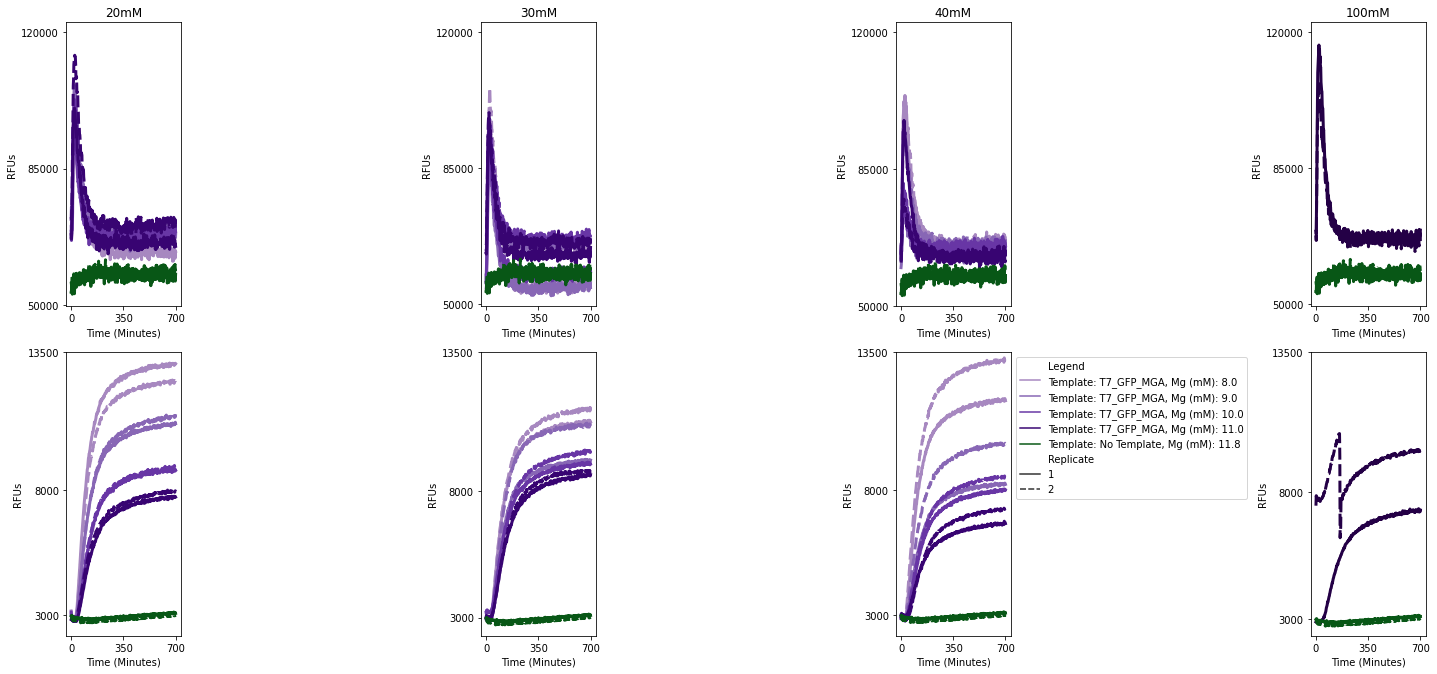

In [12]:
linewidth = 3


fig = plt.figure(figsize=(20, 10))

ax5 = plt.subplot(2, 4, 1)

sns.lineplot(        data =  k_20_mRNA,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Legend',
                     style = 'Replicate',
                     palette=palette,
                     linewidth=linewidth,
                     ax = ax5,
                     ci = None,
                     legend = None)

ax5.set_ylim([None, mRNA_max_y])
ax5.set_title("20mM")

ax5.set_xticks([0,350,700])
ax5.set_xticklabels(['0','350','700'])
ax5.set_yticks([50000,85000,120000])


ax6 = plt.subplot(2, 4, 2)

sns.lineplot(        data =  k_30_mRNA,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Legend',
                     style = 'Replicate',
                     palette=palette,
                     linewidth=linewidth,
                     ax = ax6,
                     ci = None,
                     legend = None)

ax6.set_ylim([None,mRNA_max_y])
ax6.set_title("30mM")
ax6.set_xticks([0,350,700])
ax6.set_xticklabels(['0','350','700'])
ax6.set_yticks([50000,85000,120000])


ax7 = plt.subplot(2, 4, 3)

sns.lineplot(        data =  k_40_mRNA,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Legend',
                     style = 'Replicate',
                     palette=palette,
                     linewidth=linewidth,
                     ax = ax7,
                     ci = None,
                     legend = None)

ax7.set_ylim([None, mRNA_max_y])
ax7.set_title("40mM")
ax7.set_xticks([0,350,700])
ax7.set_xticklabels(['0','350','700'])
ax7.set_yticks([50000,85000,120000])


ax8 = plt.subplot(2, 4, 4)

sns.lineplot(        data =  k_100_mRNA,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Legend',
                     style = 'Replicate',
                     palette=palette,
                     linewidth=linewidth,
                     ax = ax8,
                     ci = None,
                     legend = None)

ax8.set_ylim([None ,mRNA_max_y])
ax8.set_title("100mM")
ax8.set_xticks([0,350,700])
ax8.set_xticklabels(['0','350','700'])
ax8.set_yticks([50000,85000,120000])


##########################################################

ax1 = plt.subplot(2, 4, 5)

sns.lineplot(        data =  k_20_gfp,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Legend',
                     style = 'Replicate',
                     palette=palette,
                     linewidth=linewidth,
                     ax = ax1,
                     ci = None,
                     legend = None)

ax1.set_ylim([None, 13500])
ax1.set_ylim([None,13500])
ax1.set_xticks([0,350,700])
ax1.set_xticklabels(['0','350','700'])
ax1.set_yticks([3000,8000,13500])


ax2 = plt.subplot(2, 4, 6)
sns.lineplot(data=k_30_gfp,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Legend',
                     style = 'Replicate',
                     palette=palette,
                     linewidth=linewidth,
                     ax = ax2,
                     ci = None,
                     legend = None)

ax2.set_ylim([None, 13500])
ax2.set_ylim([None,13500])
ax2.set_xticks([0,350,700])
ax2.set_xticklabels(['0','350','700'])
ax2.set_yticks([3000,8000,13500])

ax3 = plt.subplot(2, 4, 7)
sns.lineplot(data=   k_40_gfp,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Legend',
                     style = 'Replicate',
                     palette=palette,
                     linewidth=linewidth,
                     ax = ax3,
                     ci = None,
                     legend = 'brief')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
ax3.set_ylim([None, 13500])
ax3.set_xticks([0,350,700])
ax3.set_xticklabels(['0','350','700'])
ax3.set_yticks([3000,8000,13500])


ax4 = plt.subplot(2, 4, 8)
sns.lineplot(data=   k_100_gfp,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Legend',
                     style = 'Replicate',
                     palette=palette,
                     linewidth=linewidth,
                     ax = ax4,
                     ci = None,
                     legend = None)


ax4.set_ylim([None,13500])
ax4.set_xticks([0,350,700])
ax4.set_xticklabels(['0','350','700'])
ax4.set_yticks([3000,8000,13500])




plt.subplots_adjust(hspace=5)
#plt.suptitle("GFP OPPB2 ")

fig.tight_layout()

plt.show()



In [55]:
# color palette as dictionary
palette = {"Template: T7_GFP_MGA, Mg (mM): 8.0" : "#A788C0",
           "Template: T7_GFP_MGA, Mg (mM): 9.0" : "#8867B5",
           "Template: T7_GFP_MGA, Mg (mM): 10.0" : "#6836A5",
           "Template: T7_GFP_MGA, Mg (mM): 11.0" : "#380472",
           
           "Template: T7_GFP_MGA, Mg (mM): 11.8" : "#B65578",
           "Template: No Template, Mg (mM): 11.8":"#085716"
          }


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


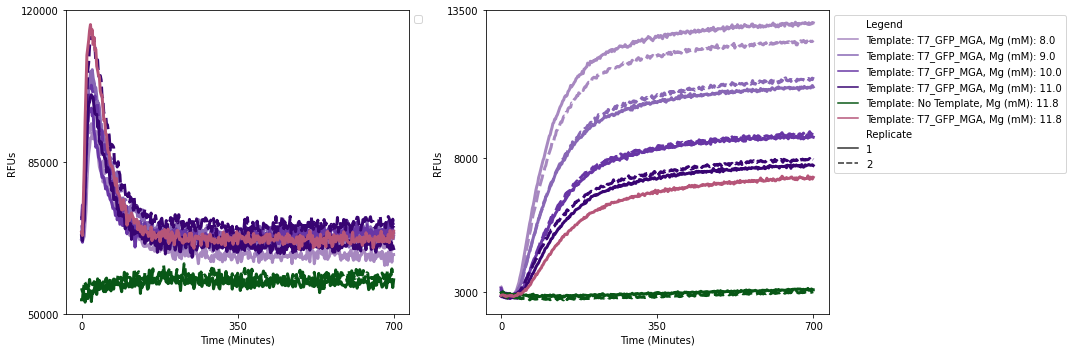

In [56]:
positive_control_gfp = GFP[GFP['K_Glutamate_mM'] == 100.0]
positive_control_gfp = positive_control_gfp[positive_control_gfp['Replicate'] == 1]
new_gfp = pd.concat([k_20_gfp, positive_control_gfp], axis=0)
new_gfp.reset_index(drop=True, inplace=True)
new_gfp = merge_plot_columns(new_gfp)



positive_control_mRNA = mRNA[mRNA['K_Glutamate_mM'] == 100.0]
positive_control_mRNA = positive_control_mRNA[positive_control_mRNA['Replicate'] == 1]
new_mRNA = pd.concat([k_20_mRNA, positive_control_mRNA], axis=0)
new_mRNA.reset_index(drop=True, inplace=True)
new_mRNA = merge_plot_columns(new_mRNA)

fig = plt.figure(figsize=(15, 5))

ax21 = plt.subplot(1, 2, 1)
sns.lineplot(data=   new_mRNA,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Legend',
                     style = 'Replicate',
                     palette=palette,
                     linewidth=linewidth,
                     ax = ax21,
                     ci = None,
                     legend = None)

plt.legend(loc = 2, bbox_to_anchor = (1,1))
ax21.set_ylim([50000, 120000])
ax21.set_xticks([0,350,700])
ax21.set_xticklabels(['0','350','700'])
ax21.set_yticks([50000,85000,120000])


ax20 = plt.subplot(1, 2, 2)
sns.lineplot(data=   new_gfp,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Legend',
                     style = 'Replicate',
                     palette=palette,
                     linewidth=linewidth,
                     ax = ax20,
                     ci = None,
                     legend = 'brief')

plt.legend(loc = 2, bbox_to_anchor = (1,1))
ax20.set_ylim([None,13500])
ax20.set_xticks([0,350,700])
ax20.set_xticklabels(['0','350','700'])
ax20.set_yticks([3000,8000,13500])

fig.tight_layout()


In [14]:
mRNA_slice_list = []

for well in mRNA['Well'].unique():
    
    well_slice = mRNA[mRNA['Well']==well]
    
    slice_metadata = well_slice.iloc[0,:]
    
    #drop the rfu column
    slice_metadata = slice_metadata.drop(labels = ['RFUs'])
    
    # add max RFU value
    slice_metadata['Max RFU'] = well_slice['RFUs'].max()
    
    mRNA_slice_list.append(slice_metadata)
    

max_mRNA_df = pd.DataFrame(mRNA_slice_list)

max_mRNA_df.reset_index(drop=True, inplace=True)

max_mRNA_df

,Well,Sample ID,Time (Minutes),Gain Setting,Chromatic Settings,Amplicon DNA Template,Energy Solution,K_Glutamate_mM,Mg_Acetate_mM,Reaction Type,Replicate,System,Reaction Temperature (°C),Performed by,Instrument,Experiment #,Assay Date,Max RFU
0,C03,Sample X1,0,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,8.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,91821
1,C06,Sample X2,0,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,8.0,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,93858
2,F03,Sample X3,0,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,9.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,106326
3,F06,Sample X4,0,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,9.0,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,104280
4,I03,Sample X5,0,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,10.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,97452
5,I06,Sample X6,0,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,10.0,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,102729
6,L03,Sample X7,0,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,11.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,100531
7,L06,Sample X8,0,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,11.0,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,114104
8,O03,Sample X9,0,3000,635_680,T7_GFP_MGA,Grassman ES,100.0,11.8,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,116726
9,O06,Sample X10,0,3000,635_680,T7_GFP_MGA,Grassman ES,100.0,11.8,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,107343


In [15]:
df_dropped = max_mRNA_df.drop(['Assay Date', 'Amplicon DNA Template', 'Performed by', 'System', 'Energy Solution', 'Experiment #', 'Instrument', 'Reaction Temperature (°C)', 'Replicate', 'Time (Minutes)', 'Sample ID', 'Well', 'Chromatic Settings', 'Gain Setting', 'Reaction Type'],axis=1)

df_dropped_copy = df_dropped.copy()

df_dropped_copy = df_dropped_copy.drop(['Max RFU'], axis=1)

df_dropped_copy.drop_duplicates(inplace = True)


mRNA_mean_list = []

for index, row in df_dropped_copy.iterrows():
    
    
    K_Glutamate_mM = row['K_Glutamate_mM']
    Mg_Acetate_mM = row['Mg_Acetate_mM']

    replicate_grab = df_dropped.loc[((df_dropped['K_Glutamate_mM'] == K_Glutamate_mM) & (df_dropped['Mg_Acetate_mM'] == Mg_Acetate_mM))]

    row["Mean"] = replicate_grab['Max RFU'].mean()

    row["SEM"] = replicate_grab['Max RFU'].sem()
    
    mRNA_mean_list.append(row)
    
    
mRNA_Mean_df =  pd.DataFrame(mRNA_mean_list)

mRNA_Mean_df.reset_index(drop=True, inplace=True)

mRNA_Mean_df

,K_Glutamate_mM,Mg_Acetate_mM,Mean,SEM
0,20.0,8.0,92839.50,1018.50000
1,20.0,9.0,105303.00,1023.00000
2,20.0,10.0,100090.50,2638.50000
3,20.0,11.0,107317.50,6786.50000
4,100.0,11.8,86341.75,14961.22752
5,30.0,8.0,98179.00,7396.00000
6,30.0,9.0,89024.00,1872.00000
7,30.0,10.0,94991.00,2667.00000
8,30.0,11.0,97683.00,1619.00000
9,40.0,8.0,103814.00,16.00000


In [16]:
mRNA_Mean_df = mRNA_Mean_df.drop([mRNA_Mean_df.index[5]])
mRNA_Mean_df.reset_index(drop=True, inplace=True)
mRNA_Mean_df

,K_Glutamate_mM,Mg_Acetate_mM,Mean,SEM
0,20.0,8.0,92839.50,1018.50000
1,20.0,9.0,105303.00,1023.00000
2,20.0,10.0,100090.50,2638.50000
3,20.0,11.0,107317.50,6786.50000
4,100.0,11.8,86341.75,14961.22752
5,30.0,9.0,89024.00,1872.00000
6,30.0,10.0,94991.00,2667.00000
7,30.0,11.0,97683.00,1619.00000
8,40.0,8.0,103814.00,16.00000
9,40.0,9.0,85250.50,9352.50000


In [17]:
mRNA_Mean_df_pivoted = mRNA_Mean_df.pivot(index = 'Mg_Acetate_mM', columns = ['K_Glutamate_mM'], values = 'Mean')

# reverse the order of the rows
mRNA_Mean_df_pivoted = mRNA_Mean_df_pivoted[::-1]  

# fill NaN
#mRNA_Mean_df_pivoted.fillna(0, inplace=True)

mRNA_Mean_df_pivoted =  mRNA_Mean_df_pivoted/1000
mRNA_Mean_df_pivoted

K_Glutamate_mM,NaN,20.0,30.0,40.0,100.0
Mg_Acetate_mM,,,,,
11.8,NaN,NaN,NaN,NaN,86.34175
11.0,NaN,107.3175,97.683,87.5290,NaN
10.0,NaN,100.0905,94.991,78.4600,NaN
9.0,NaN,105.3030,89.024,85.2505,NaN
8.0,NaN,92.8395,NaN,103.8140,NaN
NaN,NaN,NaN,NaN,NaN,NaN


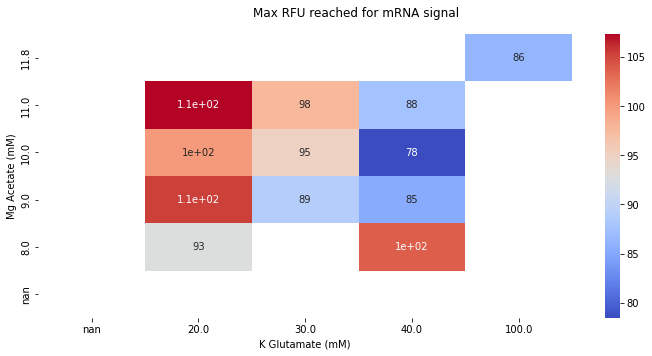

In [18]:
fig = plt.figure(figsize=(10, 5))

ax = sns.heatmap(mRNA_Mean_df_pivoted, cmap='coolwarm', xticklabels="auto", annot=True)

plt.xlabel('K Glutamate (mM)')

plt.ylabel('Mg Acetate (mM)')


fig.suptitle('Max RFU reached for mRNA signal')

plt.subplots_adjust(hspace=10)
fig.tight_layout()




plt.show()

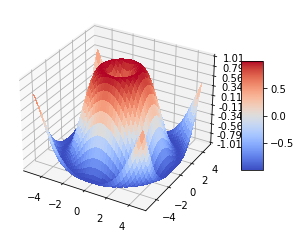

In [19]:


import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [20]:
bar_df = max_mRNA_df.drop(['Assay Date', 'Performed by', 'System', 'Energy Solution', 'Experiment #', 'Instrument', 'Reaction Temperature (°C)', 'Replicate', 'Time (Minutes)', 'Sample ID', 'Well', 'Chromatic Settings', 'Gain Setting', 'Reaction Type'],axis=1)


bar_df_copy = bar_df.copy()

bar_df_copy = bar_df_copy.drop(['Max RFU'], axis=1)

#bar_df_copy.drop_duplicates(inplace = True)


both_mean_list = []

for index, row in bar_df_copy.iterrows():
    
    
    K_Glutamate_mM = row['K_Glutamate_mM']
    Mg_Acetate_mM = row['Mg_Acetate_mM']

    replicate_grab = df_dropped.loc[((df_dropped['K_Glutamate_mM'] == K_Glutamate_mM) & (df_dropped['Mg_Acetate_mM'] == Mg_Acetate_mM))]

    row["Mean"] = replicate_grab['Max RFU'].mean()

    row["SEM"] = replicate_grab['Max RFU'].sem()
    
    both_mean_list.append(row)
    
    
both_Mean_df =  pd.DataFrame(both_mean_list)
both_Mean_df = both_Mean_df.reset_index(drop=True)

both_Mean_df = both_Mean_df.drop([both_Mean_df.index[10]])
both_Mean_df.reset_index(drop=True, inplace=True)

both_Mean_df = both_Mean_df.drop([both_Mean_df.index[10]])
both_Mean_df.reset_index(drop=True, inplace=True)

both_Mean_df = both_Mean_df.drop([both_Mean_df.index[5]])
both_Mean_df.reset_index(drop=True, inplace=True)

both_Mean_df

,Amplicon DNA Template,K_Glutamate_mM,Mg_Acetate_mM,Mean,SEM
0,T7_GFP_MGA,20.0,8.0,92839.50,1018.50000
1,T7_GFP_MGA,20.0,8.0,92839.50,1018.50000
2,T7_GFP_MGA,20.0,9.0,105303.00,1023.00000
3,T7_GFP_MGA,20.0,9.0,105303.00,1023.00000
4,T7_GFP_MGA,20.0,10.0,100090.50,2638.50000
5,T7_GFP_MGA,20.0,11.0,107317.50,6786.50000
6,T7_GFP_MGA,20.0,11.0,107317.50,6786.50000
7,T7_GFP_MGA,100.0,11.8,86341.75,14961.22752
8,T7_GFP_MGA,100.0,11.8,86341.75,14961.22752
9,T7_GFP_MGA,30.0,9.0,89024.00,1872.00000


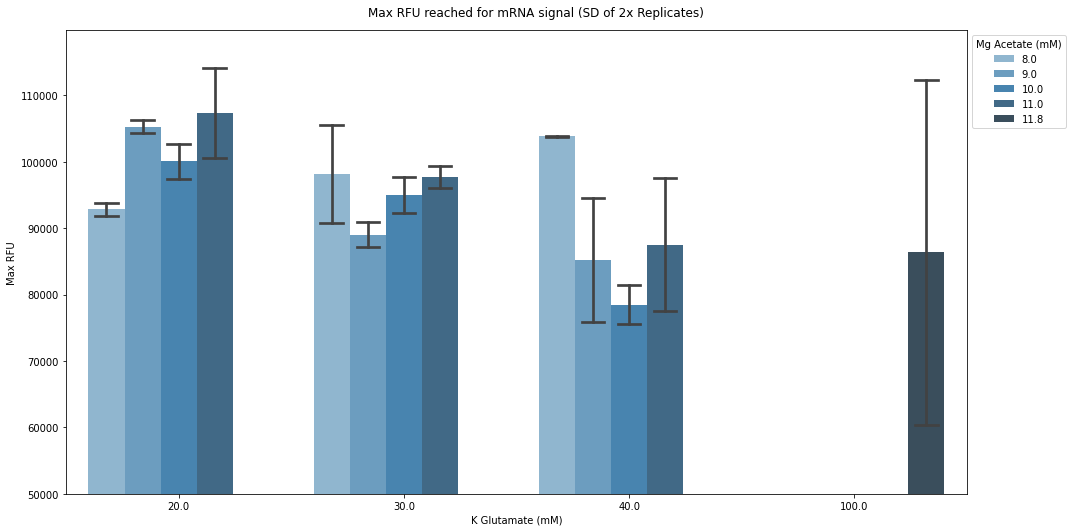

In [21]:
fig = plt.figure(figsize=(15, 7.5))

ax = sns.barplot(data=max_mRNA_df, x="K_Glutamate_mM", y="Max RFU", hue="Mg_Acetate_mM", ci ='sd', capsize=.1, palette="Blues_d")
ax.set(ylim=(50000, None))
ax.set_xlabel('K Glutamate (mM)')

#plt.title('OPP1 Salt Optimisation')
plt.legend(title = 'Mg Acetate (mM)',loc = 2, bbox_to_anchor = (1,1))


fig.suptitle('Max RFU reached for mRNA signal (SD of 2x Replicates)')

plt.subplots_adjust(hspace=10)
fig.tight_layout()




plt.show()

<Figure size 1080x540 with 0 Axes>

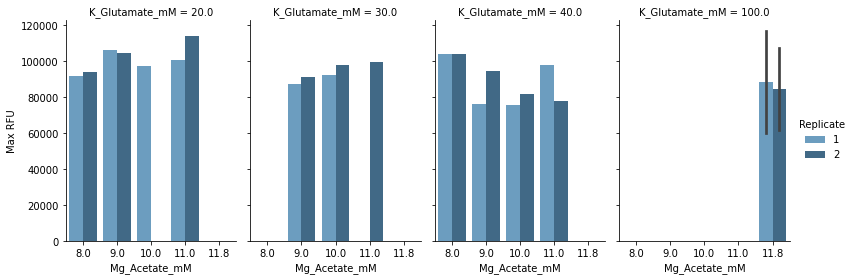

,Well,Sample ID,Time (Minutes),Gain Setting,Chromatic Settings,Amplicon DNA Template,Energy Solution,K_Glutamate_mM,Mg_Acetate_mM,Reaction Type,Replicate,System,Reaction Temperature (°C),Performed by,Instrument,Experiment #,Assay Date,Max RFU
0,C03,Sample X1,0,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,8.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,91821
1,C06,Sample X2,0,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,8.0,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,93858
2,F03,Sample X3,0,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,9.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,106326
3,F06,Sample X4,0,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,9.0,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,104280
4,I03,Sample X5,0,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,10.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,97452
5,L03,Sample X7,0,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,11.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,100531
6,L06,Sample X8,0,3000,635_680,T7_GFP_MGA,Grassman ES,20.0,11.0,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,114104
7,O03,Sample X9,0,3000,635_680,T7_GFP_MGA,Grassman ES,100.0,11.8,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,116726
8,O06,Sample X10,0,3000,635_680,T7_GFP_MGA,Grassman ES,100.0,11.8,TXTL,2,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,107343
9,F09,Sample X13,0,3000,635_680,T7_GFP_MGA,Grassman ES,30.0,9.0,TXTL,1,OnePotPure B2,30,Alex Perkins,BMG POLARstar Omega,8,2022-05-21,87152


In [22]:
catplot_df = max_mRNA_df.copy()

catplot_df = catplot_df.drop([catplot_df.index[5]])
catplot_df.reset_index(drop=True, inplace=True)
catplot_df = catplot_df.drop([catplot_df.index[9]])
catplot_df.reset_index(drop=True, inplace=True)
catplot_df = catplot_df.drop([catplot_df.index[9]])
catplot_df.reset_index(drop=True, inplace=True)
catplot_df = catplot_df.drop([catplot_df.index[13]])
catplot_df.reset_index(drop=True, inplace=True)

fig = plt.figure(figsize=(15, 7.5))

ax = sns.catplot(   x="Mg_Acetate_mM",
                    y="Max RFU",
                    hue="Replicate",
                    col="K_Glutamate_mM",
                    data = catplot_df,
                    kind="bar",
                    height=4,
                    aspect=.7,
                    palette="Blues_d",
                    legend=True
                    );



#plt.title('OPP1 Salt Optimisation')



fig.suptitle('Max RFU reached for mRNA signal')

plt.subplots_adjust(hspace=10)
fig.tight_layout()




plt.show()

catplot_df

In [23]:
cut_off_time = 500

tit_sub_main = gain_only_data.copy()
tit_sub_main = tit_sub_main[tit_sub_main['System']=='OnePotPure B1']
tit_sub_main = tit_sub_main[tit_sub_main['Time (Minutes)'] <= cut_off_time]

negative_ctrl = tit_sub_main[tit_sub_main['Amplicon DNA Template']=='None']


tit_sub_20 = tit_sub_main[tit_sub_main['K_Glutamate_mM']==20.0]
tit_sub_20 = pd.concat([tit_sub_20, negative_ctrl])

tit_sub_20_mRNA = tit_sub_20[tit_sub_20['Chromatic Settings']=="635_680"]

tit_sub_20_GFP = tit_sub_20[tit_sub_20['Chromatic Settings']=="485_520"]


tit_sub_30 = tit_sub_main[tit_sub_main['K_Glutamate_mM']==30.0]
tit_sub_30 = pd.concat([tit_sub_30, negative_ctrl])


tit_sub_30_mRNA = tit_sub_30[tit_sub_30['Chromatic Settings']=="635_680"]
tit_sub_30_GFP = tit_sub_30[tit_sub_30['Chromatic Settings']=="485_520"]


tit_sub_100 = tit_sub_main[tit_sub_main['K_Glutamate_mM']==100.0]
tit_sub_100_mRNA = tit_sub_100[tit_sub_100['Chromatic Settings']=="635_680"]
tit_sub_100_GFP = tit_sub_100[tit_sub_100['Chromatic Settings']=="485_520"]



In [24]:
# stats neededfor plotting
gfp_list = [tit_sub_20_GFP['RFUs'].max(), tit_sub_30_GFP['RFUs'].max(), tit_sub_100_GFP['RFUs'].max()]
mRNA_list = [tit_sub_20_mRNA['RFUs'].max(), tit_sub_30_mRNA['RFUs'].max(), tit_sub_100_mRNA['RFUs'].max()]

mRNA_max_y = max(mRNA_list) * 1.1
gfp_max_y = max(gfp_list) * 1.1

ValueError: Axis limits cannot be NaN or Inf

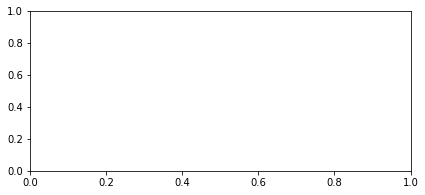

In [25]:



fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot(3, 2, 1)
sns.lineplot(data=tit_sub_20_mRNA,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Mg_Acetate_mM',
                     style = 'Amplicon DNA Template',
                     palette="tab10",
                     linewidth=2.5,
                     ax = ax1,
                     ci = None,
                     legend = 'brief')

ax1.set_ylim([None,mRNA_max_y])

ax1.set_xlabel('angle')
ax1.set_title('sine')
ax1.set_xticks([0,350,700])
ax1.set_xticklabels(['0','350','700'])
ax1.set_yticks([98.5,99.25,100])


ax1.legend(loc = 2, bbox_to_anchor = (1,1))


ax2 = plt.subplot(3, 2, 2)
sns.lineplot(data=tit_sub_20_GFP,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Amplicon DNA Template',
                     style = 'Mg_Acetate_mM',
                     palette="tab10",
                     linewidth=2.5,
                     ax = ax2,
                     ci = None,
                     legend = 'brief')

ax2.set_ylim([None, gfp_max_y])

ax2.legend(loc = 2, bbox_to_anchor = (1,1))

ax3 = plt.subplot(3, 2, 3)
sns.lineplot(data=tit_sub_30_mRNA,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Mg_Acetate_mM',
                     style = 'Amplicon DNA Template',
                     palette="tab10",
                     linewidth=2.5,
                     ax = ax3,
                     ci = None,
                     legend = 'brief')
ax3.set_ylim([None,mRNA_max_y])
ax3.legend(loc = 2, bbox_to_anchor = (1,1))


ax4 = plt.subplot(3, 2, 4)
sns.lineplot(data=tit_sub_30_GFP,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Amplicon DNA Template',
                     style = 'Mg_Acetate_mM',
                     palette="tab10",
                     linewidth=2.5,
                     ci = None,
                     ax = ax4,
                     legend = 'brief')
ax4.set_ylim([None,gfp_max_y])
ax4.legend(loc = 2, bbox_to_anchor = (1,1))

ax5 = plt.subplot(3, 2, 5)
sns.lineplot(data=tit_sub_100_mRNA,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Mg_Acetate_mM',
                     style = 'Amplicon DNA Template',
                     palette="tab10",
                     linewidth=2.5,
                     ax = ax5,
                     ci = None,
                     legend = 'brief')
ax5.set_ylim([None,mRNA_max_y])
ax5.legend(loc = 2, bbox_to_anchor = (1,1))


ax6 = plt.subplot(3, 2, 6)
sns.lineplot(data=tit_sub_100_GFP,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Amplicon DNA Template',
                     style = 'Mg_Acetate_mM',
                     palette="tab10",
                     linewidth=2.5,
                     ax = ax6,
                     ci = None,
                     legend = 'brief')
ax6.set_ylim([None,gfp_max_y])
ax6.legend(loc = 2, bbox_to_anchor = (1,1))

plt.subplots_adjust(hspace=5)
fig.tight_layout()

plt.show()

In [ ]:
cut_off_time = 500

opp2 = gain_only_data.copy()
opp2 = opp2[opp2['System']=='OnePotPure B2']
opp2 = opp2[opp2['Time (Minutes)'] <= cut_off_time]

opp2 = pd.concat([opp2, negative_ctrl])

opp2_mRNA = opp2[opp2['Chromatic Settings']=='635_680']
opp2_GFP = opp2[opp2['Chromatic Settings']=='485_520']


fig = plt.figure(figsize=(20, 10))

ax1 = plt.subplot(1, 2, 1)
sns.lineplot(data=opp2_mRNA,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Amplicon DNA Template',
                     palette="tab10",
                     linewidth=2.5,
                     ax = ax1,
                     ci = None,
                     legend = 'brief')

ax1.set_ylim([None,mRNA_max_y])

ax1.legend(loc = 2, bbox_to_anchor = (1,1))


ax2 = plt.subplot(1, 2, 2)
sns.lineplot(data=opp2_GFP,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Amplicon DNA Template',
                     palette="tab10",
                     linewidth=2.5,
                     ax = ax2,
                     ci = None,
                     legend = 'brief')

#ax2.set_ylim([None, gfp_max_y])

ax2.legend(loc = 2, bbox_to_anchor = (1,1))

plt.subplots_adjust(hspace=10)
fig.tight_layout()

plt.show()

In [ ]:
opp1_first_exp = pd.read_csv("19012022_opp1_cfps_assay_1_tidy_data_opp1.csv")



opp1_first_exp

In [ ]:
opp1_first_exp = pd.melt(opp1_first_exp,
                         id_vars = ["Time (Mins)", "Experiment"],
                         var_name = "Chromatic",
                         value_name = 'RFUs',
                         value_vars = ["584_620-10_4", "584_620-10_3", "485_520_2", "485_520_1"])

opp1_first_exp

In [ ]:
chrom1 = opp1_first_exp[opp1_first_exp["Chromatic"]=="485_520_1"]

test1 = chrom1[chrom1["Experiment"]=="OPP1, GFP, 1"]
test1['Replicate'] = 1
test1['Amplicon DNA Template'] = "T7_GFP_MGA"

test2 = chrom1[chrom1["Experiment"]=="OPP1, GFP, 2"]
test2['Replicate'] = 2
test2['Amplicon DNA Template'] = "T7_GFP_MGA"

ctrl1 = chrom1[chrom1["Experiment"]=="OPP1, -Template, 1"]
ctrl1['Replicate'] = 1
ctrl1['Amplicon DNA Template'] = "None"

ctrl2 = chrom1[chrom1["Experiment"]=="OPP1, -Template, 2"]
ctrl2['Replicate'] = 2
ctrl2['Amplicon DNA Template'] = "None"

old_test = pd.concat([test1, test2, ctrl1, ctrl2], axis=0)
old_test['System'] = "OnePotPure B1"
old_test = old_test.drop('Experiment', axis=1)
old_test['Assay Date'] = "11/01/22"
old_test['Assay Date'] = pd.to_datetime(old_test['Assay Date'])


old_test = old_test.rename(columns={'Time (Mins)': 'Time (Minutes)'})

old_test1 = old_test.drop(['Chromatic'],axis=1)

old_test1

In [ ]:
opp2_GFP_n = opp2_GFP[opp2_GFP['Amplicon DNA Template']=='None']
opp2_GFP_n_d = opp2_GFP_n.drop(['Performed by','Energy Solution','Mg_Acetate_mM','K_Glutamate_mM','Experiment #', 'Instrument', 'Reaction Temperature (°C)', 'Sample ID', 'Well', 'Chromatic Settings', 'Gain Setting', 'Reaction Type'],axis=1)
opp2_GFP_n_d

In [ ]:
opp2_GFP_d = opp2_GFP.drop(['Performed by','Energy Solution','Mg_Acetate_mM','K_Glutamate_mM','Experiment #', 'Instrument', 'Reaction Temperature (°C)', 'Sample ID', 'Well', 'Chromatic Settings', 'Gain Setting', 'Reaction Type'],axis=1)

opp2_GFP_d = opp2_GFP_d[opp2_GFP_d['System']== 'OnePotPure B2']

opp2_GFP_d = pd.concat([opp2_GFP_d, opp2_GFP_n_d])
opp2_GFP_d['System'] = 'OnePotPure B2'

In [ ]:
combined = pd.concat([old_test1, opp2_GFP_d], axis=0)
combined = combined[combined["Time (Minutes)"]<=500]

In [ ]:
y_b2_dna = combined[combined['System']=='OnePotPure B2']
y_b2_dna

In [ ]:


fig = plt.figure(figsize=(20, 10))

x = combined["Time (Minutes)"]

y_b1 = combined[combined['System']=='OnePotPure B1']

y_b1_dna = y_b1[y_b1['Amplicon DNA Template']=='T7_GFP_MGA']
y_b1_dna_r1 = y_b1_dna[y_b1_dna['Replicate']==1]
y_b1_dna_r2 = y_b1_dna[y_b1_dna['Replicate']==2]

y_b1_nodna = y_b1[y_b1['Amplicon DNA Template']=='None']
y_b1_nodna_r1 = y_b1_nodna[y_b1_nodna['Replicate']==1]
y_b1_nodna_r2 = y_b1_nodna[y_b1_nodna['Replicate']==2]

plt.plot(y_b1_dna_r1["Time (Minutes)"], y_b1_dna_r1['RFUs'], c='g', linestyle = 'dashed')
plt.plot(y_b1_dna_r1["Time (Minutes)"], y_b1_dna_r2['RFUs'], c='g', linestyle = 'dashed')
plt.plot(y_b1_dna_r1["Time (Minutes)"], y_b1_nodna_r1['RFUs'], c='b', linestyle = 'dashed')
plt.plot(y_b1_dna_r1["Time (Minutes)"], y_b1_nodna_r2['RFUs'], c='b', linestyle = 'dashed')


y_b2 = combined[combined['System']=='OnePotPure B2']

y_b2_dna = y_b2[y_b2['Amplicon DNA Template']=='T7_GFP_MGA']
y_b2_dna_r1 = y_b2_dna[y_b2_dna['Replicate']==1]
y_b2_dna_r2 = y_b2_dna[y_b2_dna['Replicate']==2]

y_b2_nodna = y_b2[y_b2['Amplicon DNA Template']=='None']
y_b2_nodna_r1 = y_b2_nodna[y_b2_nodna['Replicate']==1]
y_b2_nodna_r2 = y_b2_nodna[y_b2_nodna['Replicate']==2]

plt.plot(y_b2_dna_r1["Time (Minutes)"], y_b2_dna_r1['RFUs'], c='r')
plt.plot(y_b2_dna_r1["Time (Minutes)"], y_b2_nodna_r1['RFUs'], c='k')


#plt.plot(y_b2_nodna["Time (Minutes)"], y_b2_nodna['RFUs'])



#sns.lineplot(data = combined, x = "Time (Minutes)", y= "RFUs", hue="System", style="Amplicon DNA Template", ci=None)


In [ ]:
combined.plot(x="Time (Minutes)", y="RFUs", kind="line", subplots=True)

In [ ]:
mask = gain_only_data['Chromatic Settings'] == '485_520'
just_es = gain_only_data[mask]

sns.lineplot(data=just_es,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Amplicon DNA Template',
                     style = 'Mg_Acetate_mM',
                     palette="tab10",
                     linewidth=2.5,
                     ci = None)


#for c in just_es['Energy Solution'].unique():
    
#    isolated_system = just_es[just_es['Energy Solution'] == c]
    
    #print(isolated_system)

In [ ]:

mask = gain_only_data['Chromatic Settings'] == '635_680'
test = gain_only_data[mask]

#test['Combined'] = test['Ribosome Batch'] + ' & ' + test['Energy Solution']

fig = px.scatter_3d(test,
                 y='Time (Minutes)',
                 z='RFUs',
                 x="Mg_Acetate_mM",
                color = 'Amplicon DNA Template'
                    
                )

fig.update_traces(marker=dict(size=0.9),
                  selector=dict(mode='markers'))



fig.update_xaxes(
    showgrid=False,
    ticks="outside",
    tickson="boundaries",
    ticklen=100
)


fig.show()

In [ ]:

mask = gain_only_data['Chromatic Settings'] == '485_520'
test = gain_only_data[mask]

test['Combined'] = test['System'] + ' & ' + test['Energy Solution']

fig = px.scatter_3d(test,
                 y='Time (Minutes)',
                 z='RFUs',
                 x="Ribosome Batch",
                color = 'Amplicon DNA Template'
                    
                )

fig.update_traces(marker=dict(size=0.9),
                  selector=dict(mode='markers'))



fig.update_xaxes(
    showgrid=True,
    ticks="inside",
    tickson="labels",
    ticklabelposition = "inside top",
    ticklen=20
)


fig.show()

# Conclusions

1. PURExpress + Grassman 


In [ ]:
test = gain_only_data[gain_only_data['Chromatic Settings'] == '485_520']
test['Gain Setting'].unique()

In [ ]:
experiments_filter = (gain_only_data['Amplicon DNA Template'] == 'T7_GFP_MGA') | (gain_only_data['Amplicon DNA Template'] == 'No Template')
experiments_df = gain_only_data[experiments_filter]


In [ ]:
system_arr = gain_only_data['System'].unique()
print(type(system_arr))
print(system_arr)

In [ ]:
fig = plt.figure(figsize=(20, 10))

n=1

for s in experiments_df['System'].unique():
    isolated_system = experiments_df[experiments_df['System'] == s]
    
    for c in isolated_system['Chromatic Settings'].unique():
    
        isolated_system_and_chromatic = isolated_system[isolated_system['Chromatic Settings'] == c]
        
        ax = plt.subplot(3, 2, n)
        
        sns.lineplot(data=isolated_system_and_chromatic,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Amplicon DNA Template',
                     style = 'Replicate',
                     palette="tab10",
                     linewidth=2.5,
                     ax = ax,
                     ci = None,
                     legend = 'brief')
        
        ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        ax.set_title(c)
        ax.set_ylabel("")
        n+=1
        
axes = fig.get_axes()

experiment_labels = experiments_df['System'].unique()

for r, label in zip(range(0,6,2),experiment_labels):
    fig.get_axes()[r].set_ylabel(label, fontsize=25)


plt.subplots_adjust(hspace=10)
fig.tight_layout()
fig.suptitle("Uncalibrated TXTL over time (AFUs)", fontsize=30, y=1.05)

if save_figures == 1:
    
    os.chdir('/src/output/')
    fig.savefig('Uncalibrated TXTL over time AFUs.png')
    os.chdir('/src/processed_data_files/')
    print(os.getcwd())

plt.show()
    

In [ ]:
fig = plt.figure(figsize=(20, 10))

n=1

for s in experiments_df['System'].unique():
    isolated_system = experiments_df[experiments_df['System'] == s]
    
    for c in isolated_system['Chromatic Settings'].unique():
    
        isolated_system_and_chromatic = isolated_system[isolated_system['Chromatic Settings'] == c]
        
        ax = plt.subplot(3, 2, n)
        
        sns.lineplot(data=isolated_system_and_chromatic,
                     x='Time (Minutes)',
                     y= 'RFUs',
                     hue='Amplicon DNA Template',
                     palette="tab10",
                     linewidth=2.5,
                     ax = ax,
                     ci = 'sd',
                     legend = 'brief')
        
        ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        ax.set_title(c)
        ax.set_ylabel("")
        n+=1
        
axes = fig.get_axes()

experiment_labels = experiments_df['System'].unique()

for r, label in zip(range(0,6,2),experiment_labels):
    fig.get_axes()[r].set_ylabel(label, fontsize=25)


plt.subplots_adjust(hspace=10)
fig.tight_layout()
fig.suptitle("Uncalibrated TXTL over time (Mean & SD of AFUs of duplicates)", fontsize=30, y=1.05)


if save_figures == 1:
    
    os.chdir('/src/output/')
    fig.savefig('Uncalibrated TXTL over time (Mean of duplicates & SD of AFUs).png')
    os.chdir('/src/processed_data_files/')
    print(os.getcwd())
    


plt.show()
    

In [ ]:
standards_df = gain_only_data[~experiments_filter]
standards_df = standards_df[standards_df['Time (Minutes)']==0]
standards_df = standards_df.reset_index(drop=True)


In [ ]:
standards_dfs = pd.DataFrame(columns = ['Chromatic Settings', 'System', 'Calibrant Values'])

for c in standards_df['Chromatic Settings'].unique():
    
    chromatic_selection = standards_df[standards_df['Chromatic Settings'] == c]
    chromatic_selection = chromatic_selection[['System', 'RFUs']]
    
    chromatic_selection = chromatic_selection.reset_index(drop=True)

    system = chromatic_selection['System'].copy()
    system = system.reset_index(drop=True)
    
    calibrants = system.copy()
    
    for i,e in calibrants.iteritems():
        # remove the last two elements and make int
        
        calibrants.iloc[i] = calibrants.iloc[i][:len(calibrants.iloc[i])-2]        
        calibrants.iloc[i] = calibrants.iloc[i]

    
    chromatic_selection['Calibrant Values'] = calibrants
    
    chromatic_selection['Chromatic Settings'] = c
    
    standards_dfs = pd.concat([standards_dfs,chromatic_selection])
    
    
    
standards_dfs = standards_dfs.reset_index(drop=True)


In [ ]:
gfp_filter = (standards_dfs['Chromatic Settings'] == '485_520')
standards_dfs = standards_dfs[gfp_filter]

In [ ]:
standards_dfs['Equivalent nm FITC'] = ''
standards_dfs

In [ ]:
str(test['Gain Setting'].unique()[0])

In [ ]:
fig = plt.figure(figsize=(10, 10))

n=1


chromatic_selection = standards_dfs[['Calibrant Values',  'RFUs']]



x = chromatic_selection['Calibrant Values'].to_numpy().reshape(-1, 1).astype(float)
y = chromatic_selection['RFUs'].to_numpy()


model = LinearRegression()
model.fit(x,y)

coefficient = float(model.coef_)

r_sq = model.score(x, y)


#x = pd.Series(x.reshape(-1))
#y=pd.Series(y.reshape(-1))


linedata = pd.DataFrame(
    list(zip(
             pd.Series(x.reshape(-1)),
             pd.Series(y.reshape(-1)),
             pd.Series(model.predict(x))
            )),
            columns=['x','y','y_'])

ax = plt.subplot(2, 1, n)

sns.scatterplot(data=linedata,x='x', y='y', ax=ax)

sns.lineplot(data=linedata, x='x', y='y_', ax=ax, color='g', label=('r_sq: '+str(round(r_sq,3))))
ax.legend(loc='best')
ax.set_title('Ex/Em: ' + standards_dfs['Chromatic Settings'].unique()[0] + ', Gain: ' + str(test['Gain Setting'].unique()[0]))
ax.set_xlabel("nM FITC")
ax.set_ylabel("AFUs")
n+=1



    
    
    
plt.subplots_adjust(hspace=10)
fig.tight_layout()
fig.suptitle("Standard Curve", fontsize=30, y=1.05)

if save_figures == 1:
    
    os.chdir('/src/output/')
    fig.savefig('Standard Curve.png')
    os.chdir('/src/processed_data_files/')
    print(os.getcwd())
    

#experiments_df[experiments_df['Equivalent nm FITC']=='485_520_1']

In [ ]:
experiments_df

In [ ]:
Equivalent_nm_FITC = []

for i,row in experiments_df.iterrows():
        
    if row['Chromatic Settings'] == '485_520':
        #print(model_list[0][1].predict(np.array(row['RFUs']).reshape(-1, 1)))

        Equivalent_nm_FITC.append(float(model.predict(np.array(row['RFUs']).reshape(-1, 1))))


    elif row['Chromatic Settings'] == '635_680':


        Equivalent_nm_FITC.append('Not appropriate')

    
    else:

        Equivalent_nm_FITC.append('NA')
        

#experiments_df['Equivalent nm FITC'] = Equivalent_nm_FITC

In [ ]:
experiments_df['Equivalent nM FITC'] = Equivalent_nm_FITC

In [ ]:
type(experiments_df.iloc[0, 11])

In [ ]:
Equivalent_um_FITC = []

for i,row in experiments_df.iterrows():
    
        
    if row['Equivalent nM FITC'] == 'Not appropriate':

        Equivalent_um_FITC.append('Not appropriate')


    elif type(row['Equivalent nM FITC']) == float:
        
        uM = row['Equivalent nM FITC']/1000
        
        Equivalent_um_FITC.append(uM)


experiments_df['Equivalent μM FITC'] = Equivalent_um_FITC


In [ ]:
experiments_df

In [ ]:
fig = plt.figure(figsize=(20, 10))

n=1

for s in experiments_df['System'].unique():
    
    isolated_system = experiments_df[experiments_df['System'] == s]
    
    for c in isolated_system['Chromatic Settings'].unique():

        ax = plt.subplot(3, 2, n)

        if n%2 != 0:
            
            chromatic = '635_680'
            
            isolated_system_and_chromatic = isolated_system[isolated_system['Chromatic Settings'] == '635_680']

            sns.lineplot(data = isolated_system_and_chromatic,
                         x='Time (Minutes)',
                         y='RFUs',
                         hue='Construct',
                         style='Replicate',
                        ax =ax,
                        ci = 'sd'
                        )
            ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
            ax.set_title(chromatic)


        elif n%2 ==0:
            
            chromatic = '485_520'

            isolated_system_and_chromatic = isolated_system[isolated_system['Chromatic Settings'] == '485_520']
            
            sns.lineplot(data = isolated_system_and_chromatic,
                         x='Time (Minutes)',
                         y='Equivalent μM FITC',
                         hue='Construct',
                         style='Replicate',
                        ax =ax,
                        ci = 'sd'
                        )
            
            ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
            ax.set_title(chromatic)

        n+=1
            
axes = fig.get_axes()

experiment_labels = experiments_df['System'].unique()

for r, label in zip(range(0,6,2),experiment_labels):
    fig.get_axes()[r].set_ylabel(label, fontsize=25)


plt.subplots_adjust(hspace=10)
fig.tight_layout()
fig.suptitle("Calibrated TXTL over time", fontsize=30, y=1.05)


if save_figures == 1:
    
    os.chdir('/src/output/')
    fig.savefig('Calibrated TXTL over time.png')
    os.chdir('/src/processed_data_files/')
    print(os.getcwd())
    


plt.show()

In [ ]:
fig = plt.figure(figsize=(20, 10))

n=1

for s in experiments_df['System'].unique():
    
    isolated_system = experiments_df[experiments_df['System'] == s]
    
    for c in isolated_system['Chromatic Settings'].unique():

        ax = plt.subplot(3, 2, n)

        if n%2 != 0:
            
            chromatic = '635_680'
            
            isolated_system_and_chromatic = isolated_system[isolated_system['Chromatic Settings'] == '635_680']

            sns.lineplot(data = isolated_system_and_chromatic,
                         x='Time (Minutes)',
                         y='RFUs',
                         hue='Construct',
                        ax =ax,
                        ci = 'sd'
                        )
            ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
            ax.set_title(chromatic)


        elif n%2 ==0:
            
            chromatic = '485_520'

            isolated_system_and_chromatic = isolated_system[isolated_system['Chromatic Settings'] == '485_520']
            
            sns.lineplot(data = isolated_system_and_chromatic,
                         x='Time (Minutes)',
                         y='Equivalent μM FITC',
                         hue='Construct',
                        ax =ax,
                        ci = 'sd'
                        )
            
            ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
            ax.set_title(chromatic)

        n+=1
            
axes = fig.get_axes()

experiment_labels = experiments_df['System'].unique()

for r, label in zip(range(0,6,2),experiment_labels):
    fig.get_axes()[r].set_ylabel(label, fontsize=25)


plt.subplots_adjust(hspace=10)
fig.tight_layout()
fig.suptitle("Calibrated TXTL over time (Mean & SD of AFUs of duplicates)", fontsize=30, y=1.05)


if save_figures == 1:
    
    os.chdir('/src/output/')
    fig.savefig('Calibrated TXTL over time (Mean & SD of AFUs of duplicates).png')
    os.chdir('/src/processed_data_files/')
    print(os.getcwd())
    


plt.show()